## pCMV-Target-ACE construction
The Target-ACE plasmid (pCMV-Target-ACE) was constructed with a fragment encoding a plasmid backbone as well as ABE7.10 amplified from pCMV-ABE7.10 using RS047/RS052 and a fragment encoding the C-terminus region of Target-AID amplified from pcDNA-pCMV-nCas9 using RS051/RS046.

In [1]:
%matplotlib inline

In [2]:
import sys 
sys.path.append("../../")
from QUEEN.queen import *
set_namespace(globals()) 
if "output" not in os.listdir("./"):
    os.mkdir("output")

In [3]:
#Load GenBank input from the benchling share link
QUEEN(record="https://benchling.com/s/seq-K4HkSd2E8WiTAulJUeBf", dbtype="benchling", product="pCMV_ABE")
QUEEN(record="https://benchling.com/s/seq-cfnGDU0Mq8cUwn185LPF", dbtype="benchling", product="pcDNA31_Target_AID")

<queen.QUEEN object; project='pcDNA31_Target_AID', length='10419 bp', topology='circular'>

In [4]:
processname1 = "PCR"
description1 = "The backbone fragment (fragment4) was amplified from pCMV-ABE7.10 using RS047/RS052"
QUEEN(seq="ACCTCCTCCACCGTCACCCCCAAGCTGTGACA", product="RS052")
QUEEN("ATCAAGATGCTATAATGAGTTTAAACCCGCTGATC",  product="RS047")
pCMV_ABE.searchsequence(RS047.seq[-18:], product="FW4", pn=processname1, pd=description1)
pCMV_ABE.searchsequence(RS052.seq[-18:], product="RV4", pn=processname1, pd=description1)
f4 = cropdna(pCMV_ABE, FW4[0].end, RV4[0].start, product="extract4", pn=processname1, pd=description1)
modifyends(extract4, RS047.seq, RS052.rcseq, product="fragment4",    pn=processname1, pd=description1)

<queen.QUEEN object; project='fragment4', length='8695 bp', topology='linear'>

In [5]:
processname2 = "PCR"
description2 = "The insert fragment (fragment5) encoding the C-terminus region of Target-AID was \
amplified from pcDNA-pCMV-nCas9 using RS051/RS046."
QUEEN(seq="TTTAAACTCATTATAGCATCTTGATCTTGTTCTCTC", product="RS046")
QUEEN(seq="GCTTGGGGGTGACGGTGGAGGAGGTACCGGCGG", product="RS051")
pcDNA31_Target_AID.searchsequence(RS051.seq[-18:], product="FW5", pn=processname2, pd=description2)
pcDNA31_Target_AID.searchsequence(RS046.seq[-18:], product="RV5", pn=processname2, pd=description2)
f5 = cropdna(pcDNA31_Target_AID, FW5[0].end, RV5[0].start, product="extract5", pn=processname2, pd=description2)
modifyends(extract5, RS051.seq, RS046.rcseq, product="fragment5", pn=processname2, pd=description2)

<queen.QUEEN object; project='fragment5', length='1211 bp', topology='linear'>

In [6]:
processname3 = "Gibson Assembly"
description3 = "The Target-ACE plasmid (pCMV-Target-ACE) was constructed by \
assembling the insert fragment and a backbone fragment."
modifyends(fragment4, "*{25}/-{25}","-{25}/*{25}", product="fragment4", pn=processname3, pd=description3)
modifyends(fragment5, "*{25}/-{25}","-{25}/*{25}", product="fragment5", pn=processname3, pd=description3)
joindna(fragment4, fragment5, topology="circular", product="pCMV_Target_ACE", pn=processname3, pd=description3)

<queen.QUEEN object; project='pCMV_Target_ACE', length='9856 bp', topology='circular'>

In [7]:
pCMV_Target_ACE.printfeature()

feature_id  feature_type  qualifier:label     start  end   strand  
1           source        source              0      3450  +       
100         primer_bind   BGH-rev             2      20    -       
200         polyA_signal  bGH poly(A) signal  8      233   +       
300         primer_bind   M13 Reverse         303    320   -       
400         primer_bind   M13/pUC Reverse     316    339   -       
500         protein_bind  lac operator        327    344   +       
600         promoter      lac promoter        351    382   -       
700         protein_bind  CAP binding site    396    418   +       
800         primer_bind   L4440               534    552   -       
900         rep_origin    ori                 705    1294  -       
1000        primer_bind   pBR322ori-F         785    805   -       
1100        CDS           AmpR                1464   2325  -       
1200        primer_bind   Amp-R               2087   2107  +       
1300        promoter      AmpR promoter       23

In [8]:
#Verification of quine code
quine(pCMV_Target_ACE, execution=True)

The quine code correctly reconstructed the given QUEEN object.


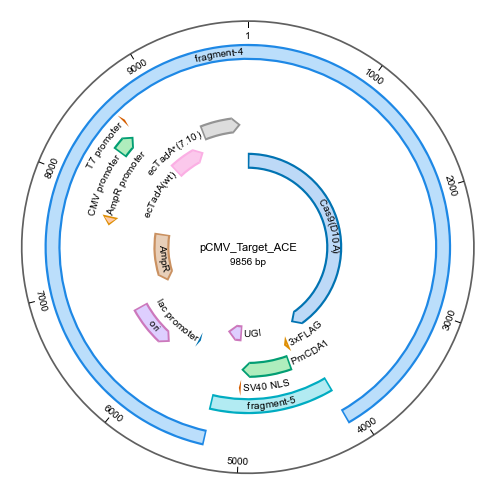

In [9]:
#Visuailze annotated sequence map
list600  = ["#E53935","#D81B60","#8E24AA","#5E35B1","#3949AB","#1E88E5","#039BE5","#00ACC1","#00897B","#43A047","#7CB342","#C0CA33","#FDD835","#FFB300","#FB8C00","#F4511E","#6D4C41","#546E7A"]
list100  = ["#ffcdd2","#f8bbd0","#e1bee7","#d1c4e9","#c5cae9","#bbdefb","#b3e5fc","#b2ebf2","#b2dfdb","#c8e6c9","#dcedc8","#f0f4c3","#fff9c4","#ffecb3","#ffe0b2","#ffccbc","#d7ccc8","#cfd8dc"]
color_sets = list(zip(list600,list100))
color_sets = [color_sets[0], color_sets[2], color_sets[4], color_sets[5], color_sets[7], color_sets[1], color_sets[3], color_sets[9], color_sets[10], color_sets[12], color_sets[14], color_sets[16], color_sets[11], color_sets[17]]

def add_fragment_annotation(dna, fragment, fragment_id, color_set):
    f = dna.searchsequence(fragment.seq)
    editfeature(dna, source=f, target_attribute="feature_id", operation=createattribute("f{}".format(fragment_id)), new_copy=False)
    editfeature(dna, key_attribute="feature_id", query="f{}".format(fragment_id), target_attribute="qualifier:label", operation=createattribute("fragment-{}".format(fragment_id)), new_copy=False)
    editfeature(dna, key_attribute="feature_id", query="f{}".format(fragment_id), target_attribute="qualifier:edgecolor_queen", operation=createattribute(color_set[0]), new_copy=False)
    editfeature(dna, key_attribute="feature_id", query="f{}".format(fragment_id), target_attribute="qualifier:facecolor_queen", operation=createattribute(color_set[1]), new_copy=False)
    editfeature(dna, key_attribute="feature_id", query="f{}".format(fragment_id), target_attribute="strand", operation=replaceattribute(0), new_copy=False)

def visualization(dna):
    dna.searchfeature(key_attribute="qualifier:label", query="^Cas9", product="Cas9")
    plasmid = joindna(cutdna(dna, Cas9[0].start)[0], topology="circular") 
    fragments = plasmid.searchfeature(key_attribute="qualifier:label", query="fragment-[0-9]+")
    for i in range(len(fragments)):
        fragments[i].location.strand = 0
    fragments.sort(key=lambda x:int(x.qualifiers["label"][0].split("-")[1]))
    features  = plasmid.searchfeature(key_attribute="feature_type", query="CDS") + plasmid.searchfeature(key_attribute="feature_type", query="promoter") + plasmid.searchfeature(key_attribute="feature_type", query="rep_origin") + fragments
    fig       = visualizedna(plasmid, feature_list=features, map_view="circular", tick_space=1000, title=dna.project)
    return fig

add_fragment_annotation(pCMV_Target_ACE, fragment4, "4", color_sets[3])
add_fragment_annotation(pCMV_Target_ACE, fragment5, "5", color_sets[4])
fig = visualization(pCMV_Target_ACE)

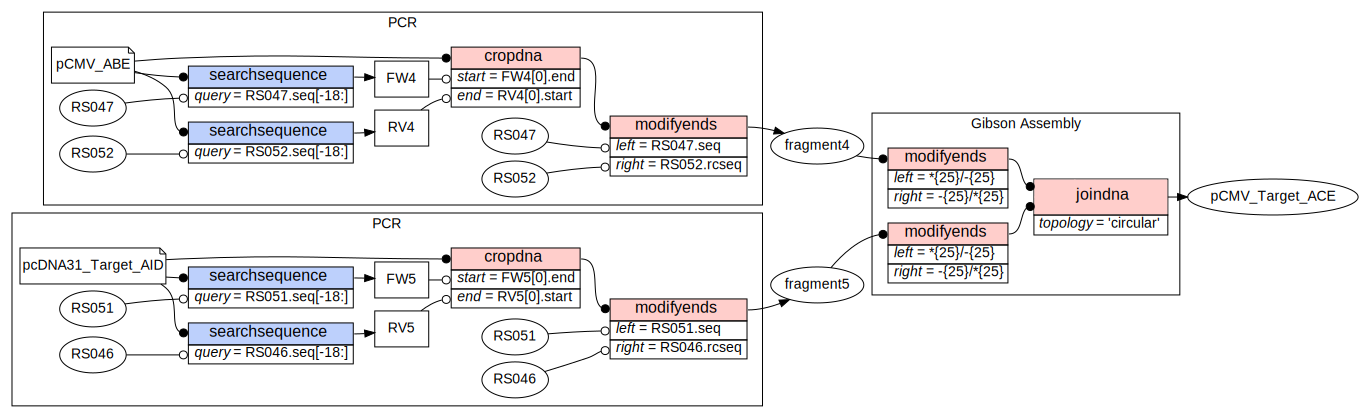

In [10]:
flow = visualizeflow(pCMV_Target_ACE)
flow.render("output/pCMV_Target_ACE_construction")
flow

In [11]:
pCMV_Target_ACE.writedna("output/pCMV-Target-ACE.gbk")